<a href="https://colab.research.google.com/github/IshanKapadia-Data/Predicting-BankChurn/blob/main/Predicting_Bank_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

df = pd.read_csv("Bank Customer Churn Prediction.csv")

print("\n=== Dataset Info ===")
print(df.info())

print("\n=== Summary Statistics ===")
print(df.describe())

print("\n=== Missing Values ===")
print(df.isnull().sum())


=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None

=== Summary Statistics ===
        customer_id  credit_score           age        tenure        balance  \
count  1.000000e+04  10000.000000  

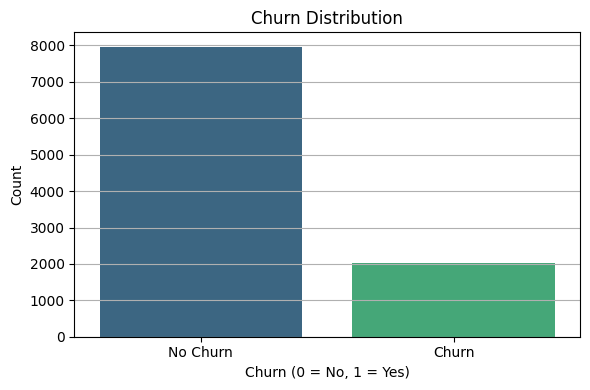

In [2]:
# Plot churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df, hue='churn', palette='viridis', legend=False)
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

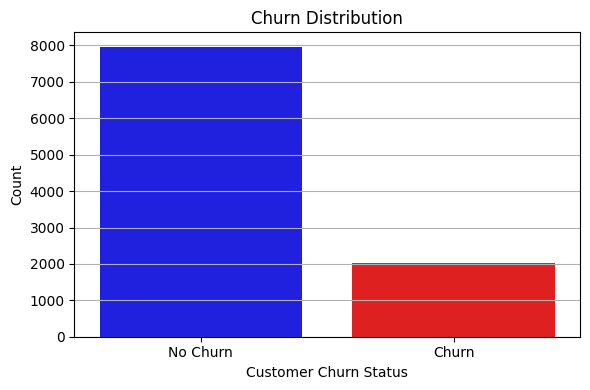

In [4]:
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df, hue='churn', palette=['blue', 'red'], legend=False)
plt.title('Churn Distribution')
plt.xlabel('Customer Churn Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()


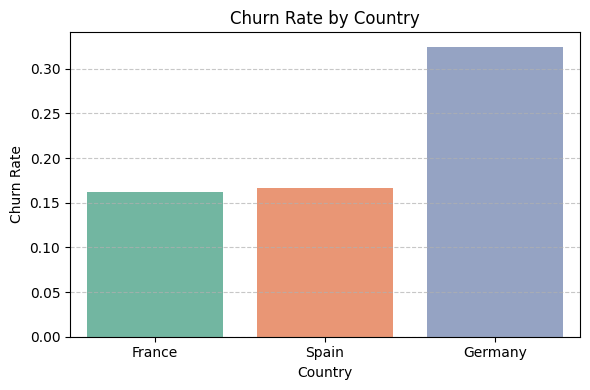

In [8]:
plt.figure(figsize=(6, 4))
sns.barplot(x='country', y='churn', data=df, hue='country', palette='Set2', errorbar=None, legend=False)
plt.title("Churn Rate by Country")
plt.ylabel("Churn Rate")
plt.xlabel("Country")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


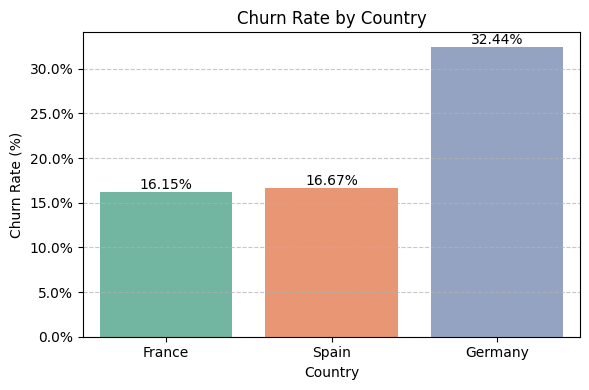

In [9]:
import matplotlib.ticker as mtick

plt.figure(figsize=(6, 4))
ax = sns.barplot(x='country', y='churn', data=df, hue='country', palette='Set2', errorbar=None, legend=False)

# Format y-axis as percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Annotate percentages on bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height*100:.2f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.title("Churn Rate by Country")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Country")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


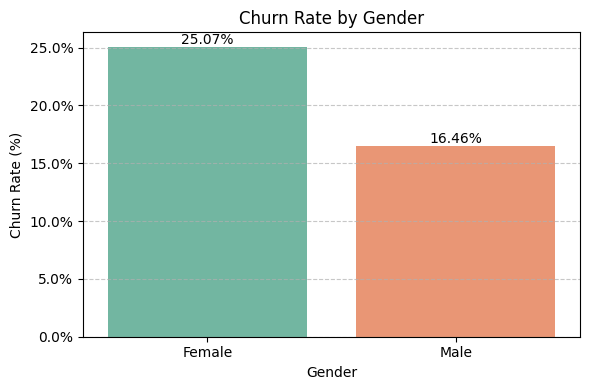

In [10]:
import matplotlib.ticker as mtick

plt.figure(figsize=(6, 4))
ax = sns.barplot(x='gender', y='churn', data=df, hue='gender', palette='Set2', errorbar=None, legend=False)

# Format y-axis as percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Annotate percentages on bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height*100:.2f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.title("Churn Rate by Gender")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Gender")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


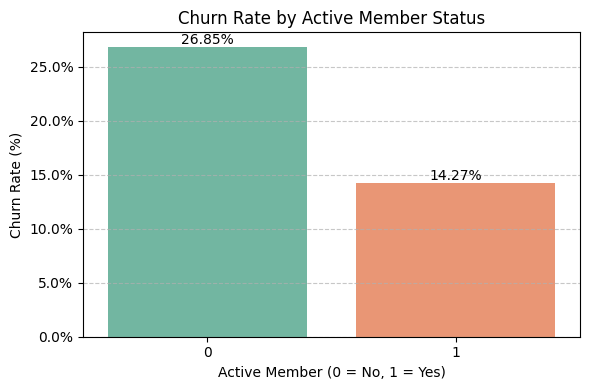

In [11]:
plt.figure(figsize=(6, 4))
ax = sns.barplot(x='active_member', y='churn', data=df, hue='active_member', palette='Set2', errorbar=None, legend=False)

# Format y-axis as percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Annotate percentages on bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height*100:.2f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.title("Churn Rate by Active Member Status")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Active Member (0 = No, 1 = Yes)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


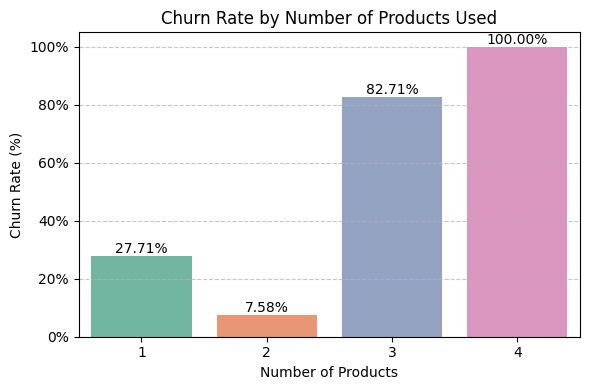

In [12]:
plt.figure(figsize=(6, 4))
ax = sns.barplot(x='products_number', y='churn', data=df, hue='products_number', palette='Set2', errorbar=None, legend=False)

# Format y-axis as percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Annotate percentages on bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height*100:.2f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.title("Churn Rate by Number of Products Used")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Number of Products")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


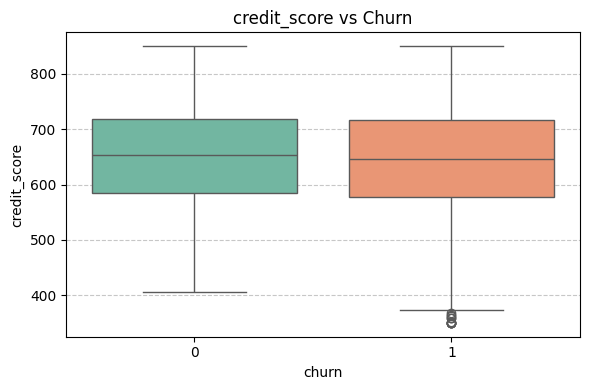

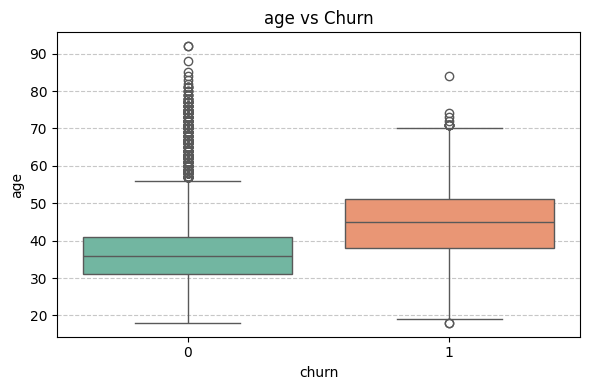

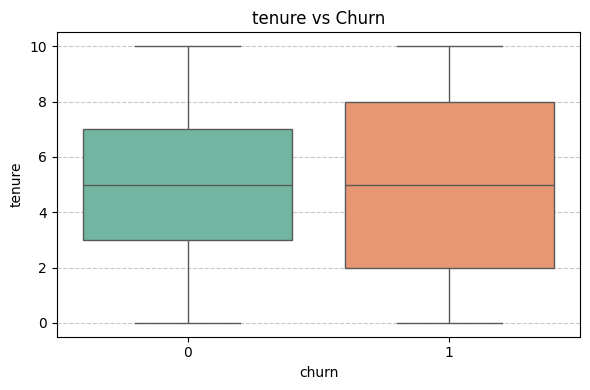

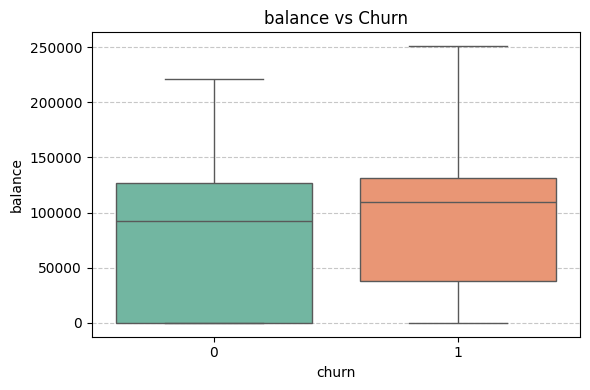

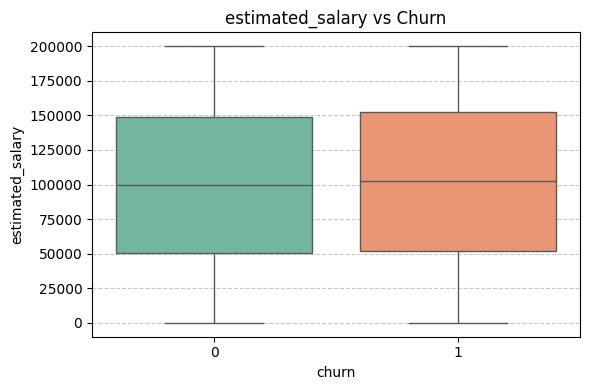

In [16]:
import seaborn as sns

num_cols = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='churn', y=col, data=df, hue='churn', palette='Set2', legend=False)
    plt.title(f"{col} vs Churn")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


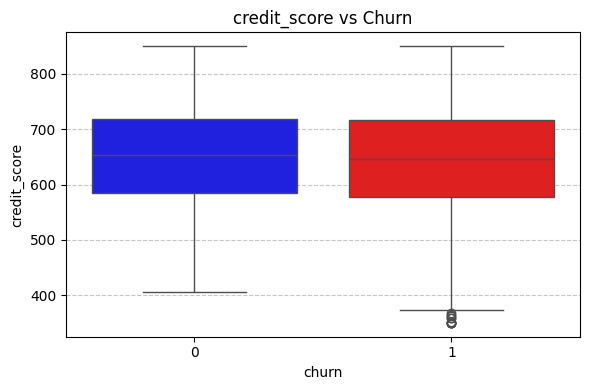

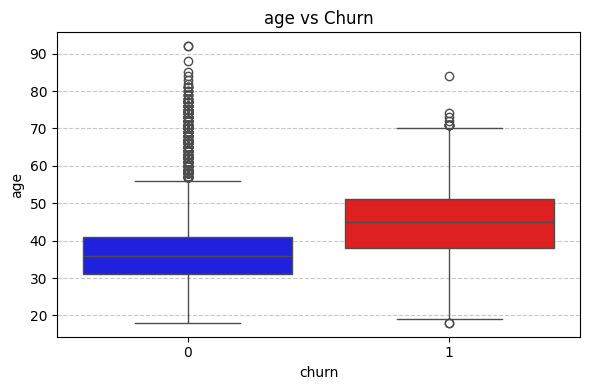

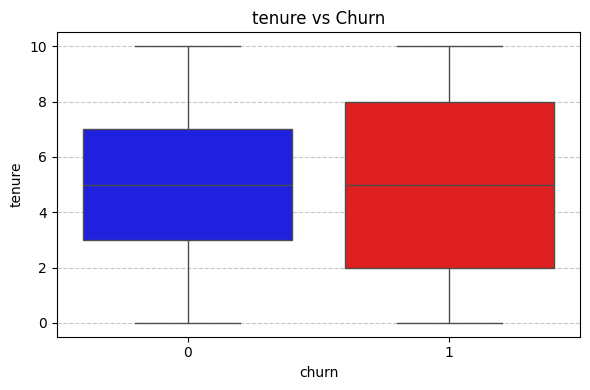

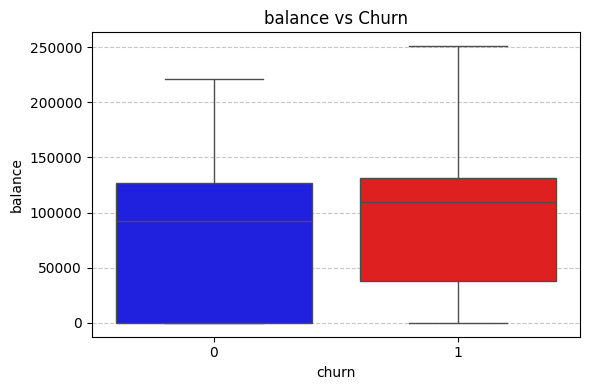

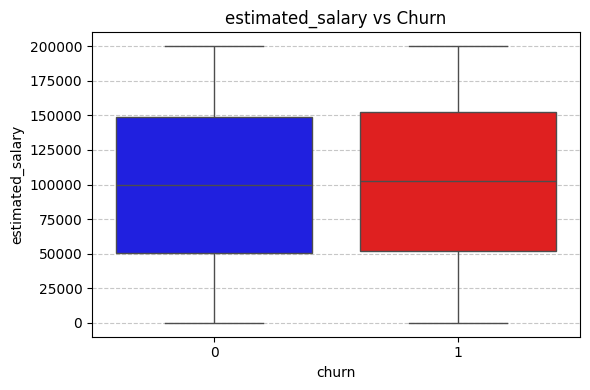

In [17]:
import seaborn as sns

num_cols = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']

# Define custom palette: 0 (No Churn) = Blue, 1 (Churn) = Red
palette = {0: 'blue', 1: 'red'}

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='churn', y=col, data=df, hue='churn', palette=palette)
    plt.title(f"{col} vs Churn")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend().set_visible(False)
    plt.tight_layout()
    plt.show()


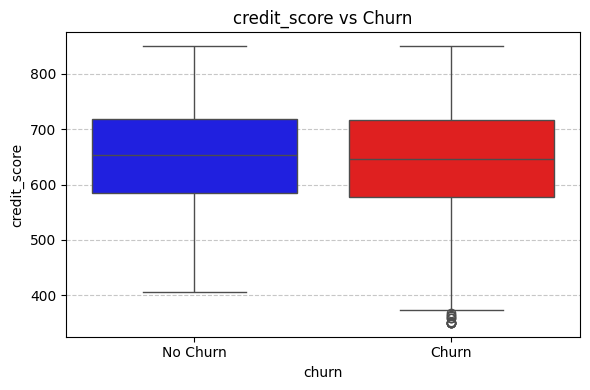

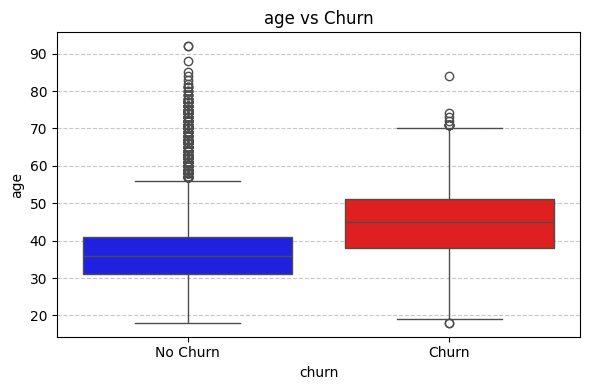

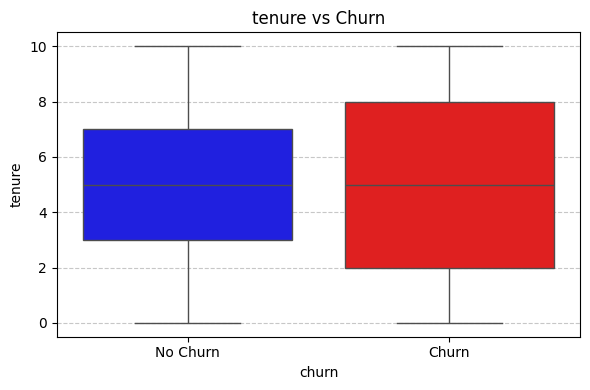

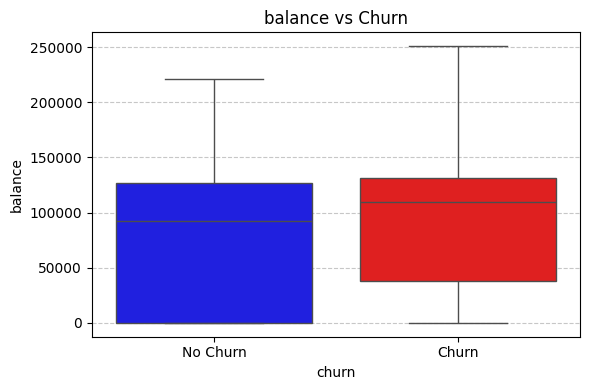

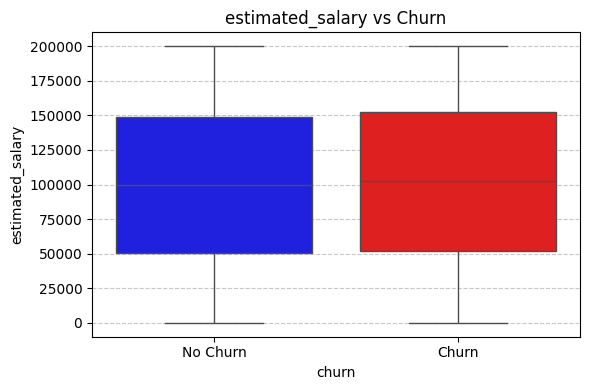

In [18]:
import seaborn as sns

num_cols = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']
palette = {0: 'blue', 1: 'red'}

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='churn', y=col, data=df, hue='churn', palette=palette)
    plt.title(f"{col} vs Churn")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks([0, 1], ['No Churn', 'Churn'])
    plt.legend().set_visible(False)
    plt.tight_layout()
    plt.show()


In [19]:
# Drop customer_id
df_model = df.drop(columns=["customer_id"])

# One-hot encode categorical features
df_encoded = pd.get_dummies(df_model, columns=["country", "gender"], drop_first=True)


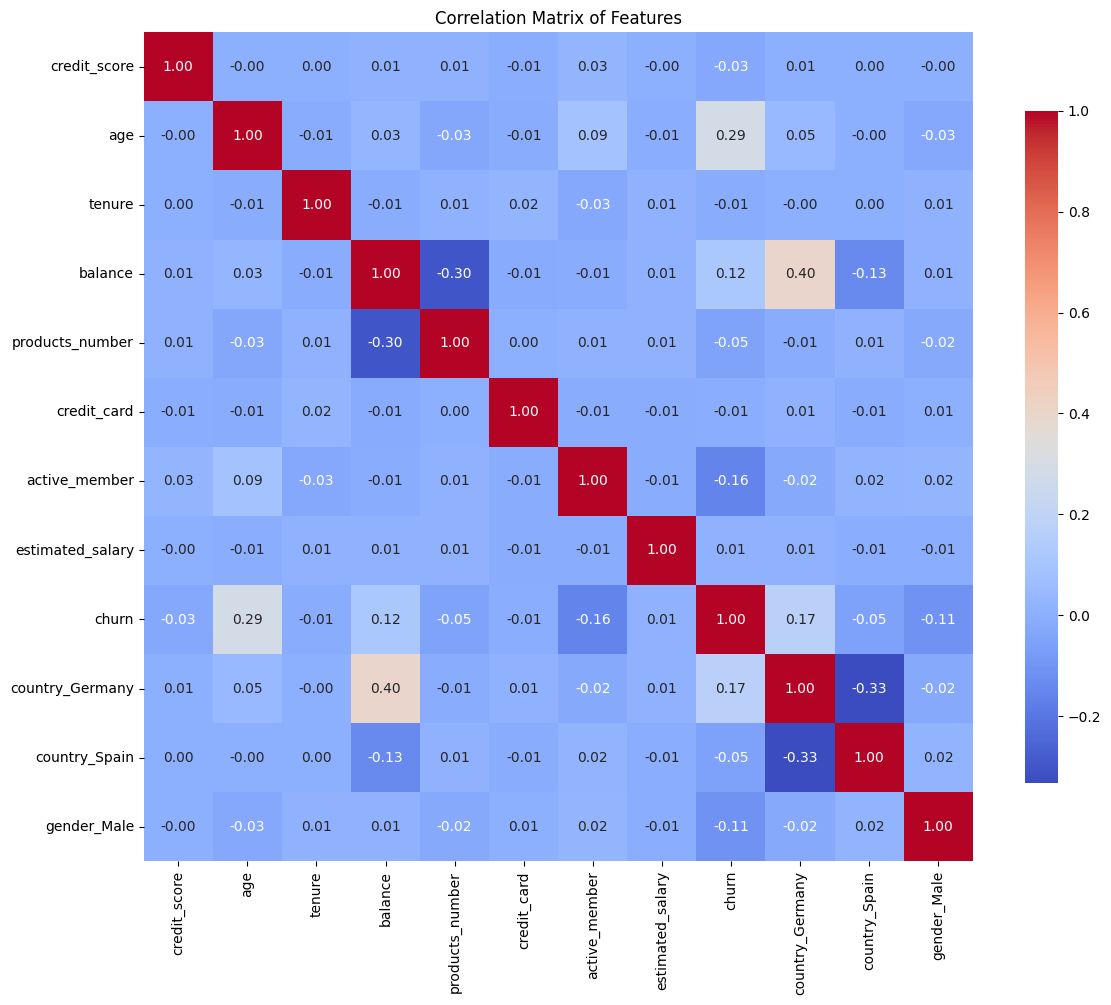

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
corr_matrix = df_encoded.corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'shrink': .8})
plt.title("Correlation Matrix of Features")
plt.tight_layout()
plt.show()


In [21]:
# Separate features and target
X = df_encoded.drop(columns=["churn"])
y = df_encoded["churn"]

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=31, stratify=y
)

# Feature scaling for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Show output shapes and features
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (8000, 11)
X_test shape: (2000, 11)



Logistic Regression Metrics:
Accuracy: 0.7120
Precision: 0.3844
Recall: 0.6904
F1 Score: 0.4938
ROC AUC: 0.7682


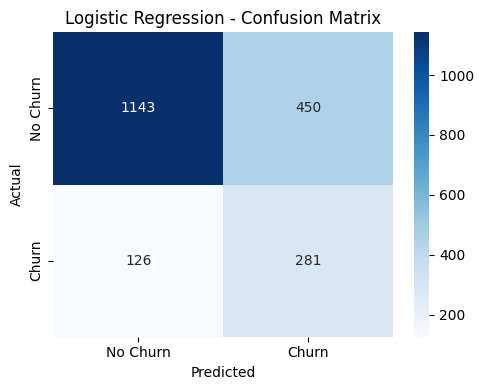

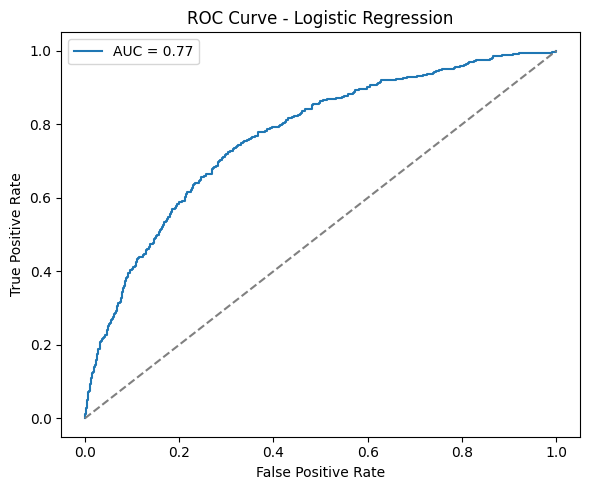

In [22]:
# Train Logistic Regression model
log_reg = LogisticRegression(class_weight='balanced', random_state=31)
log_reg.fit(X_train_scaled, y_train)

# Predict
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# Evaluation metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
conf_mat = confusion_matrix(y_test, y_pred)

# Print metrics
print("\nLogistic Regression Metrics:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Confusion matrix plot
plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression - Confusion Matrix")
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.tight_layout()
plt.show()


Random Forest Metrics:
Accuracy: 0.8535
Precision: 0.7336
Recall: 0.4398
F1 Score: 0.5499
ROC AUC: 0.8494


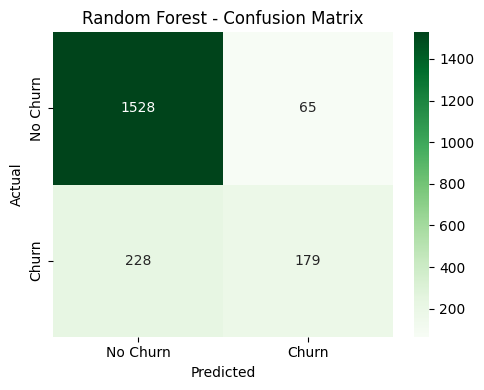

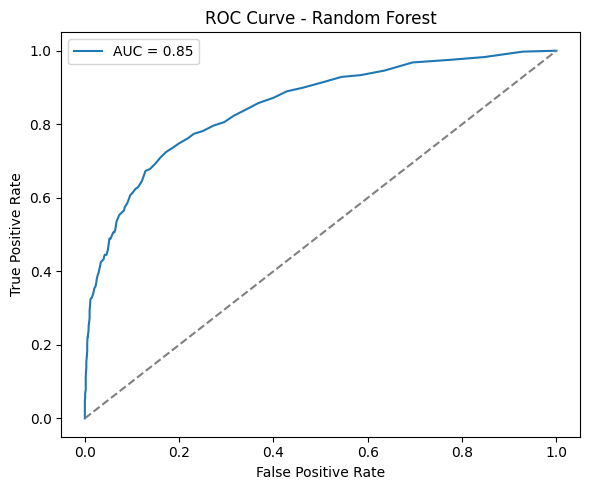

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest with class_weight balanced
rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=31)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)

# Print metrics
print("\nRandom Forest Metrics:")
print(f"Accuracy: {acc_rf:.4f}")
print(f"Precision: {prec_rf:.4f}")
print(f"Recall: {rec_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"ROC AUC: {roc_auc_rf:.4f}")

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest - Confusion Matrix")
plt.tight_layout()
plt.show()

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(6, 5))
plt.plot(fpr_rf, tpr_rf, label=f"AUC = {roc_auc_rf:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.tight_layout()
plt.show()


In [24]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20, 25, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced']
}

rf = RandomForestClassifier(random_state=31)

rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=30,  # Try 30 random combinations
    cv=5,
    scoring='roc_auc',
    random_state=31,
    n_jobs=-1,
    verbose=1
)

rf_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", rf_search.best_params_)
print("Best ROC AUC on CV:", rf_search.best_score_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'class_weight': 'balanced'}
Best ROC AUC on CV: 0.8625607959087362



Tuned Random Forest Metrics on Test Set:
Accuracy: 0.8355
Precision: 0.5882
Recall: 0.6388
F1 Score: 0.6125
ROC AUC: 0.8585


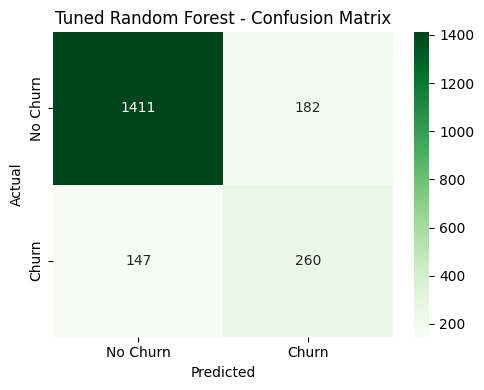

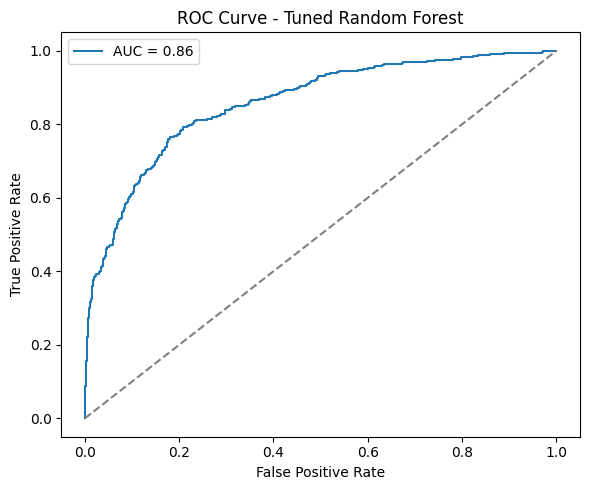

In [25]:
# Train the best tuned Random Forest model on the training set
best_rf = rf_search.best_estimator_
best_rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf_best = best_rf.predict(X_test)
y_proba_rf_best = best_rf.predict_proba(X_test)[:, 1]

# Evaluate metrics
acc_rf_best = accuracy_score(y_test, y_pred_rf_best)
prec_rf_best = precision_score(y_test, y_pred_rf_best)
rec_rf_best = recall_score(y_test, y_pred_rf_best)
f1_rf_best = f1_score(y_test, y_pred_rf_best)
roc_auc_rf_best = roc_auc_score(y_test, y_proba_rf_best)
conf_mat_rf_best = confusion_matrix(y_test, y_pred_rf_best)

# Print metrics
print("\nTuned Random Forest Metrics on Test Set:")
print(f"Accuracy: {acc_rf_best:.4f}")
print(f"Precision: {prec_rf_best:.4f}")
print(f"Recall: {rec_rf_best:.4f}")
print(f"F1 Score: {f1_rf_best:.4f}")
print(f"ROC AUC: {roc_auc_rf_best:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat_rf_best, annot=True, fmt='d', cmap='Greens',
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Tuned Random Forest - Confusion Matrix")
plt.tight_layout()
plt.show()

# Plot ROC Curve
fpr_rf_best, tpr_rf_best, _ = roc_curve(y_test, y_proba_rf_best)
plt.figure(figsize=(6, 5))
plt.plot(fpr_rf_best, tpr_rf_best, label=f"AUC = {roc_auc_rf_best:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned Random Forest")
plt.legend()
plt.tight_layout()
plt.show()



Model Comparison:
                     Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0      Logistic Regression    0.7120   0.384405  0.690418  0.493849  0.768150
1  Random Forest (Default)    0.8535   0.733607  0.439803  0.549923  0.849444
2      Tuned Random Forest    0.8355   0.588235  0.638821  0.612485  0.858513


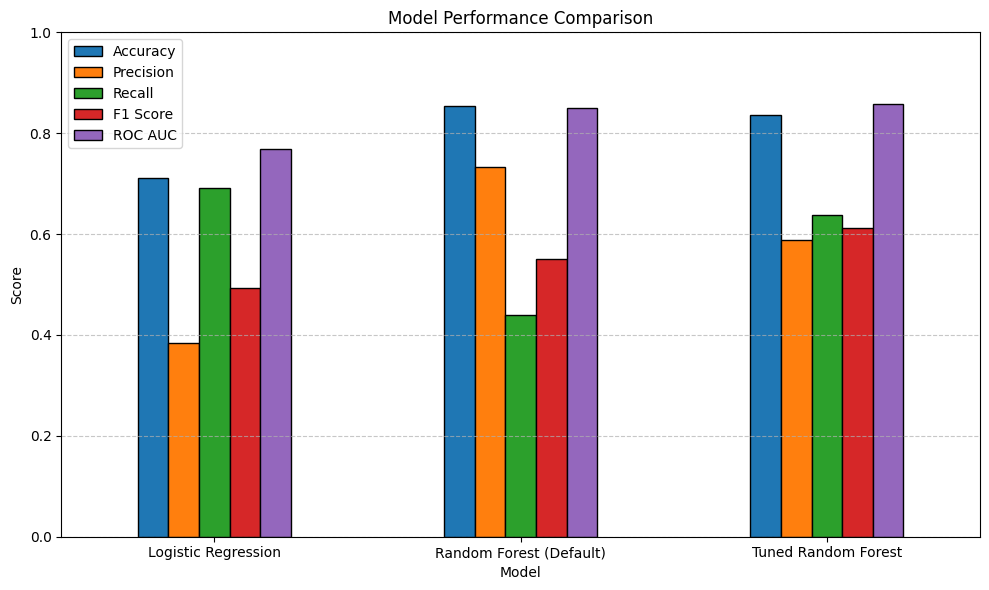

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to evaluate and return metrics
def evaluate_model(name, y_true, y_pred, y_proba):
    return {
        'Model': name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
        'ROC AUC': roc_auc_score(y_true, y_proba)
    }

# Logistic Regression Evaluation
metrics_lr = evaluate_model(
    "Logistic Regression", y_test, y_pred, y_proba
)

# Random Forest (Default) Evaluation
metrics_rf_default = evaluate_model(
    "Random Forest (Default)", y_test, y_pred_rf, y_proba_rf
)

# Tuned Random Forest Evaluation
metrics_rf_tuned = evaluate_model(
    "Tuned Random Forest", y_test, y_pred_rf_best, y_proba_rf_best
)

# Collect results into a DataFrame
results_df = pd.DataFrame([metrics_lr, metrics_rf_default, metrics_rf_tuned])

# Display comparison table
print("\nModel Comparison:")
print(results_df)

# Optional: Plot comparison
results_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']].plot(
    kind='bar', figsize=(10, 6), ylim=(0, 1), edgecolor='black'
)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Top 10 Features by Importance:
             Feature  Importance
1                age    0.348763
4    products_number    0.197344
3            balance    0.117623
7   estimated_salary    0.071935
0       credit_score    0.070326
6      active_member    0.057726
8    country_Germany    0.055047
2             tenure    0.041270
10       gender_Male    0.021347
5        credit_card    0.009873


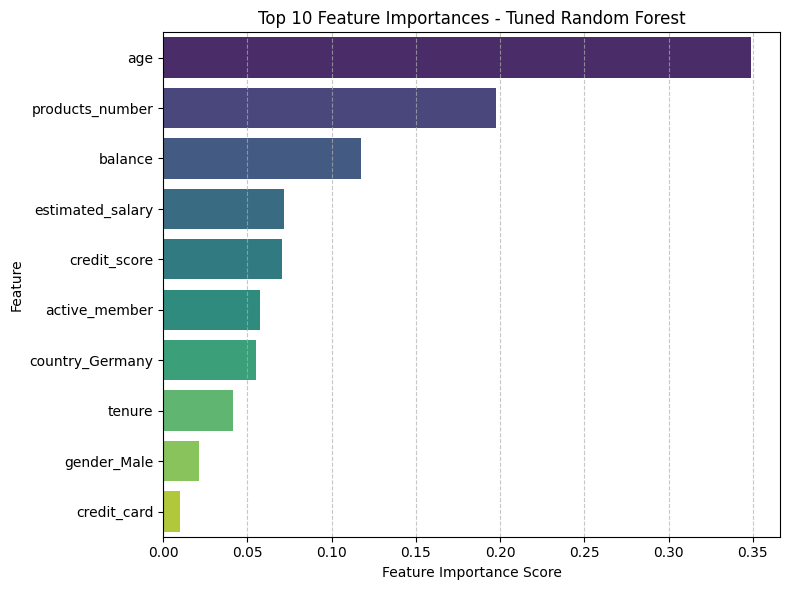

In [29]:
# Get feature importances from the tuned Random Forest
importances = best_rf.feature_importances_
features = X.columns

# Create a DataFrame for sorting and plotting
feat_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display top 10 features
print("\nTop 10 Features by Importance:")
print(feat_importance_df.head(10))

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df.head(10), hue='Feature', palette='viridis', legend=False)
plt.title("Top 10 Feature Importances - Tuned Random Forest")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
